In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
plt.style.use('dark_background')
%matplotlib inline

<h1>Importação e descrição do dataset</h1>

In [2]:
from sklearn.datasets import load_boston
boston = load_boston() 

df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['Target'] = boston.target
df['CHAS'].astype('category')
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<h2>Descrição dos dados</h2>
<ol>
<li>CRIM: per capita crime rate by town</li>
<li>ZN: proportion of residential land zoned for lots over 25,000 sq.ft.</li>
<li>INDUS: proportion of non-retail business acres per town</li>
<li>CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)</li>
<li>NOX: nitric oxides concentration (parts per 10 million)</li>
<li>RM: average number of rooms per dwelling</li>
<li>AGE: proportion of owner-occupied units built prior to 1940</li>
<li>DIS: weighted distances to five Boston employment centres</li>
<li>RAD: index of accessibility to radial highways</li>
<li>TAX: full-value property-tax rate per 10,000</li>
<li>PTRATIO: pupil-teacher ratio by town</li>
<li>B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town</li>
<li>LSTAT: % lower status of the population</li>
<li>TARGET: Median value of owner-occupied homes in $1000's</li>
</ol>

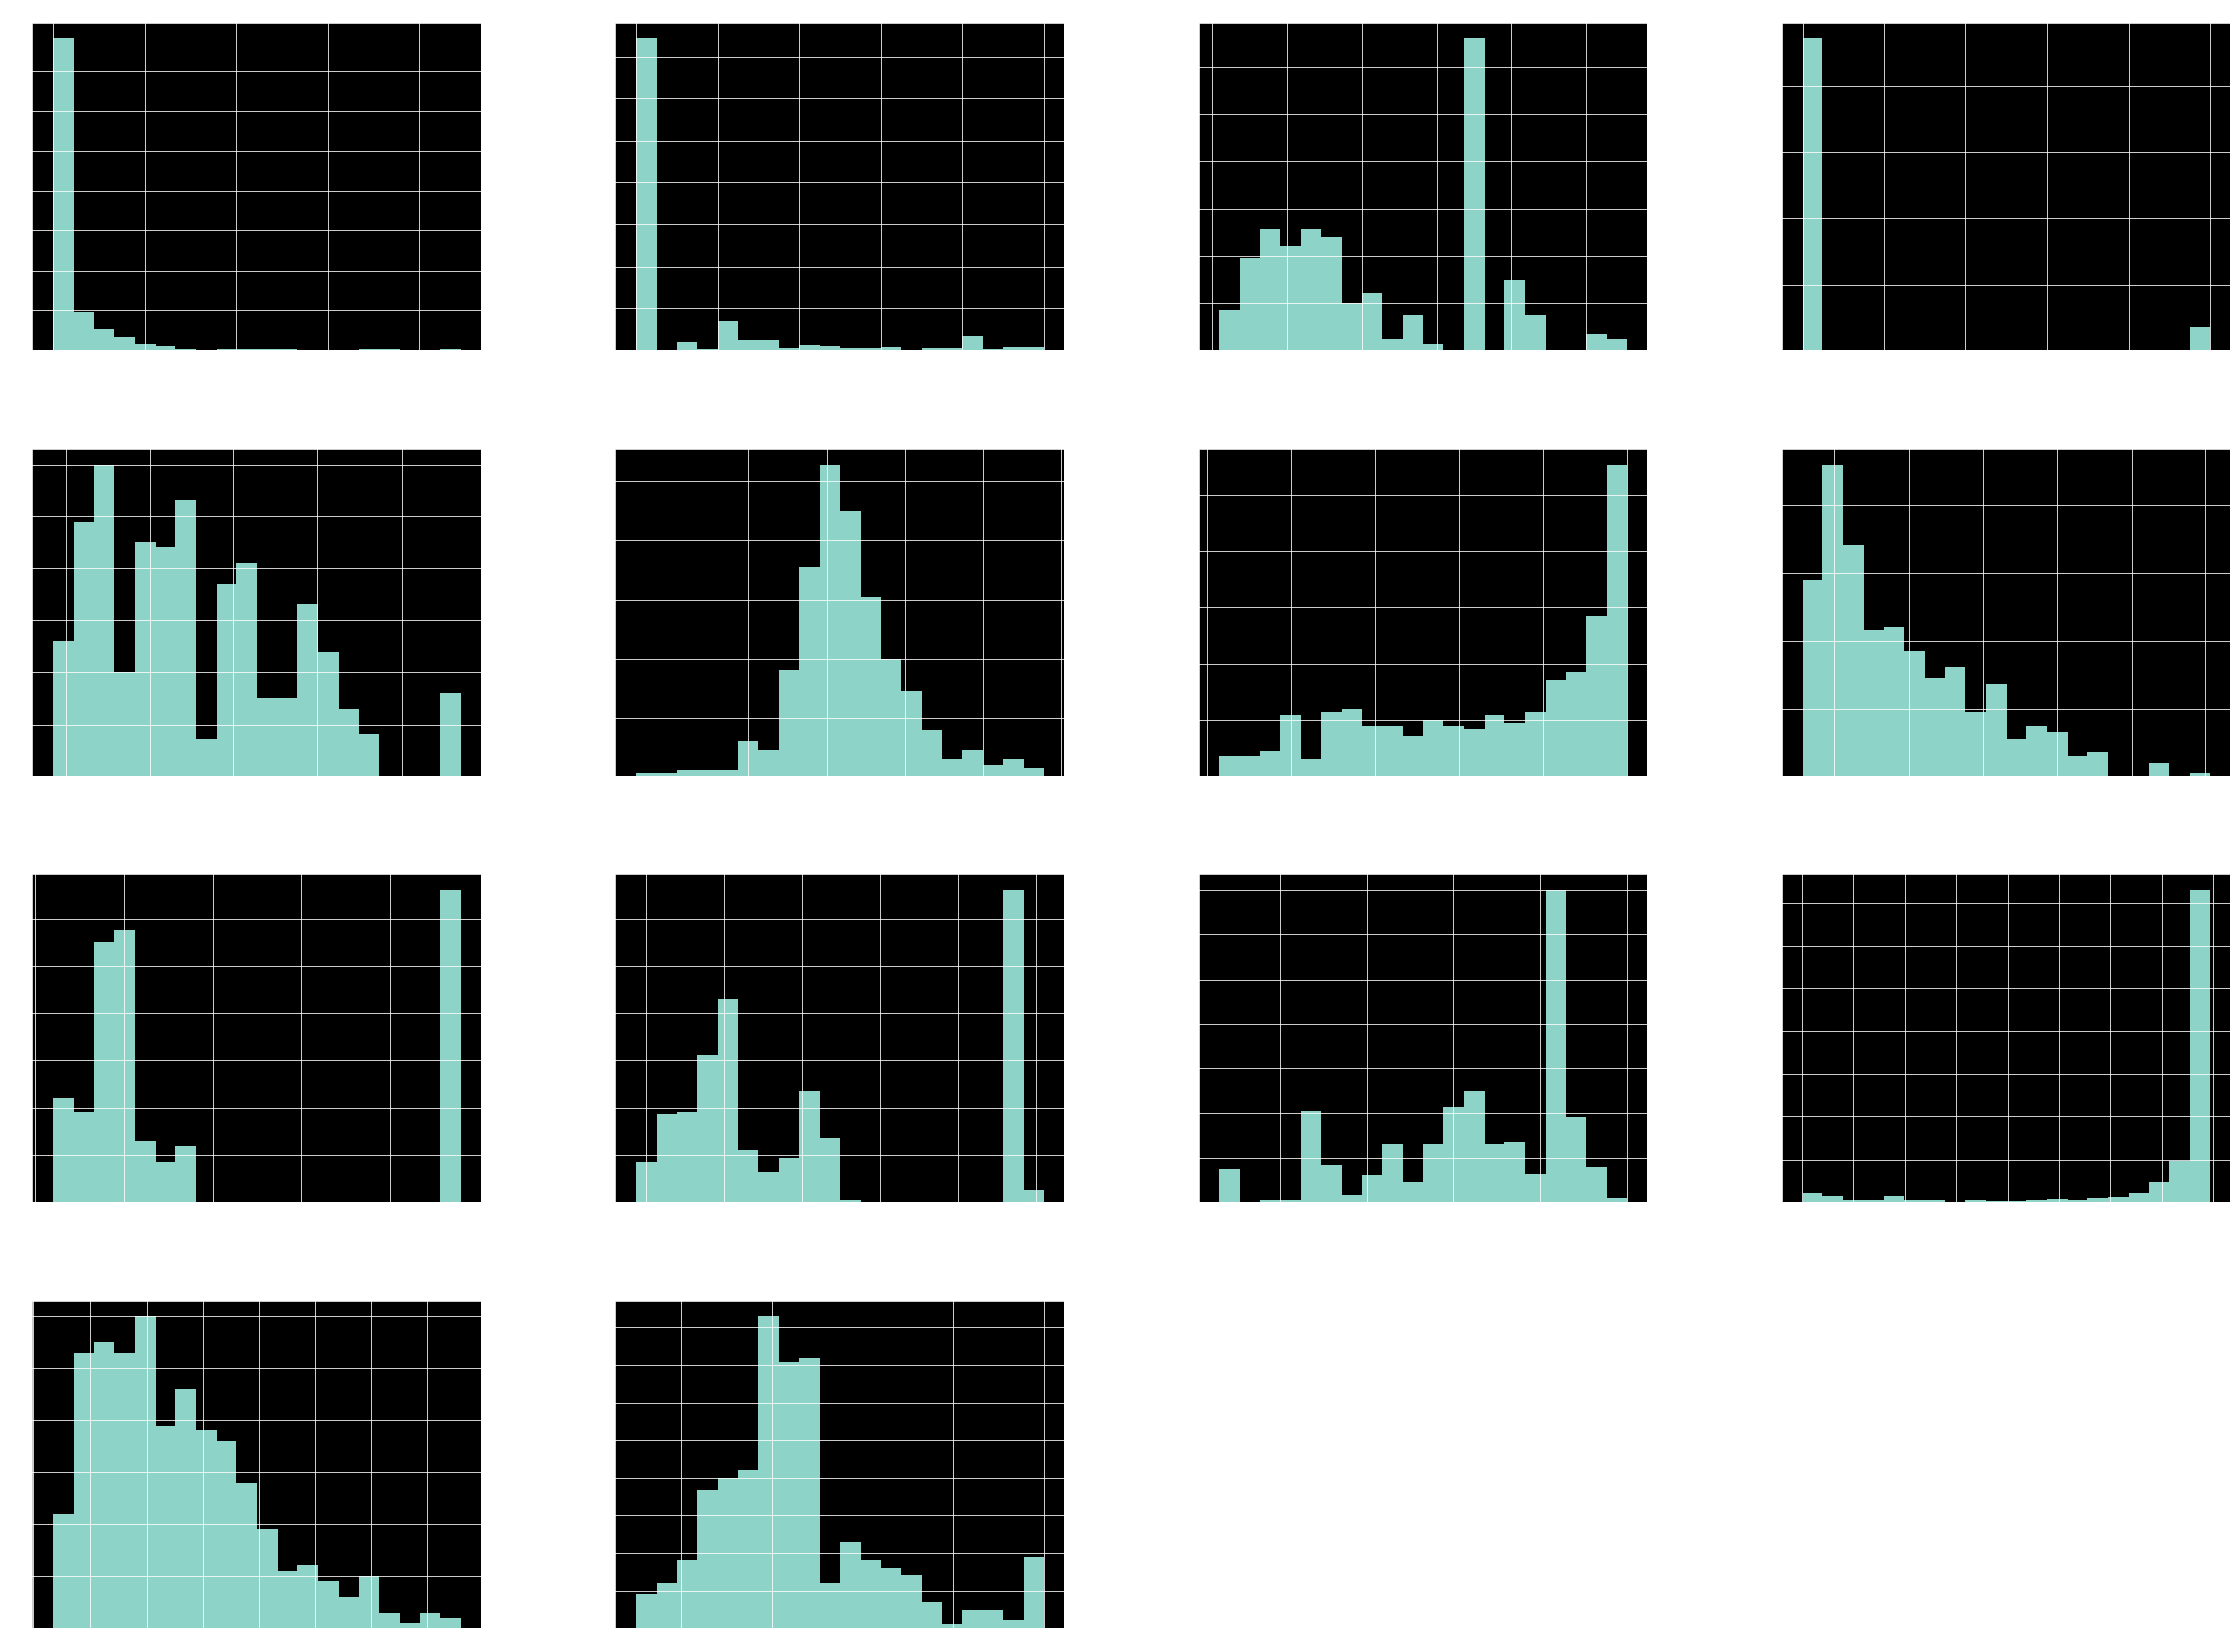

In [3]:
#Uma visualização 'geral' dos dados
fig, *axes = df.hist(bins = 20, figsize = (40,30))


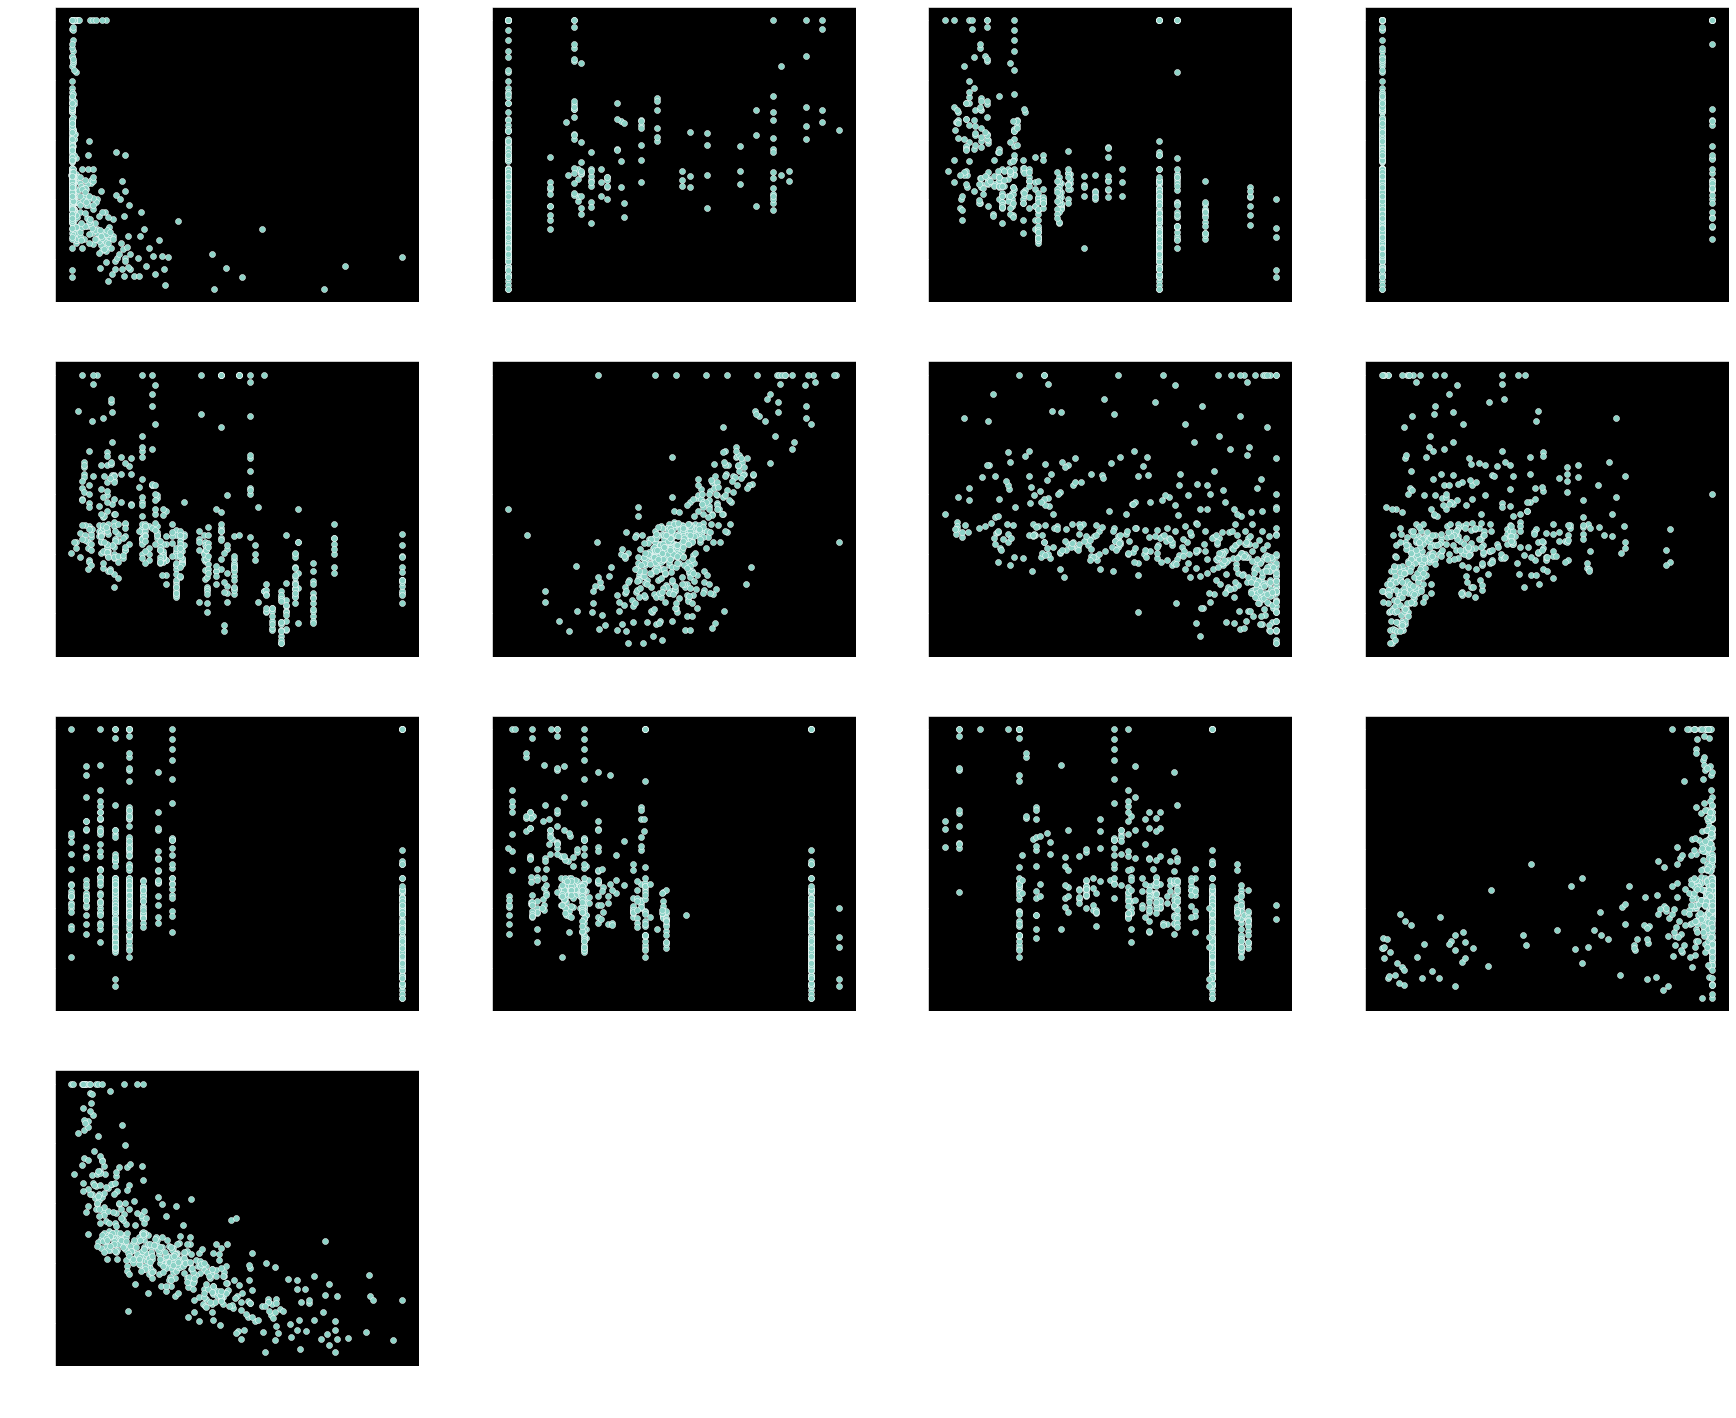

In [4]:
figure = plt.figure(figsize = (30, 25))
plt.rcParams["axes.labelsize"] = 25
chart_grid = {'lines' : 4, 'columns' : 4}

k = 1

for lines in range(0, chart_grid['lines']):
    for col in range(0, chart_grid['columns']):
        if(k > 13):
            break
        plt.subplot(chart_grid['lines'], chart_grid['columns'], k)
        sbn.scatterplot(x = df.iloc[:, k -1], y = df['Target'])
        k = k + 1
plt.show()

In [5]:
#Uma matriz de correlação preliminar
correlation = df.corr().apply(lambda x: round(x,2))
correlation.loc['Target'].sort_values(ascending = False)

Target     1.00
RM         0.70
ZN         0.36
B          0.33
DIS        0.25
CHAS       0.18
RAD       -0.38
AGE       -0.38
CRIM      -0.39
NOX       -0.43
TAX       -0.47
INDUS     -0.48
PTRATIO   -0.51
LSTAT     -0.74
Name: Target, dtype: float64

<AxesSubplot:>

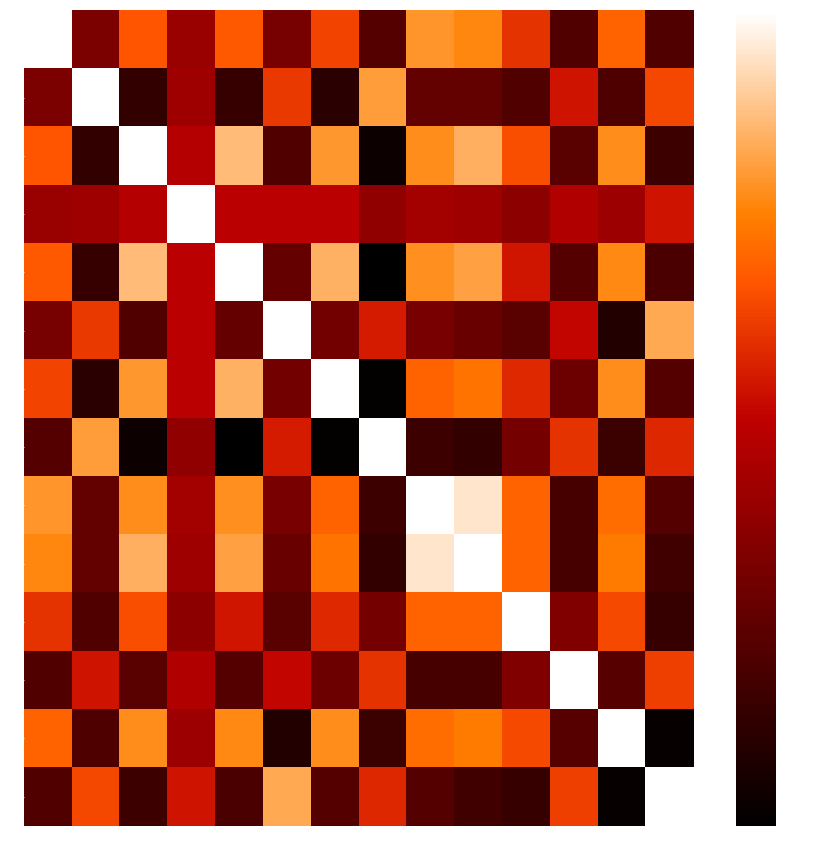

In [6]:
plt.figure(figsize = (15,15))
plt.rcParams["axes.labelsize"] = 25
sbn.heatmap(correlation, cmap = 'gist_heat')

<h5>Algumas considerações sobre os dados</h5>
<ol>
<li>O número de quartos parece ter uma grande correlação com o preço das casas nos bairros, como é de se esperar</li>
<li>Também dentro do esperado, a % de população nas classes econômicas mais inferiores também é um fator de alta correlação</li>
<li>Ao contrário do primeiro projeto, também sobre casas, o preço médio das casas não aparenta ter uma grande concentração de valores altos.</li>
<li>Neste momento, não parecem ser necessárias transformações nos dados.</li>
</ol>